In [20]:
# LSW Mu;i Labelled Classification
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from scipy.sparse import hstack
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import OneHotEncoder
import scipy.sparse

from sklearn.metrics import multilabel_confusion_matrix
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from collections.abc import Sequence, Set

dataset_dir_path = "~/Desktop/Tickets"
tickets = pd.read_csv(f"{dataset_dir_path}/multi_labelled_data.csv")

tickets.head()

,Unnamed: 0,ID,Text,Timestamp,Beschreibung,Kategorie ID,Unterkategorie ID,Ticket Label,Abteilung Label,Produkt Label,...,stemmed_text,stemmed_beschreibung,Produkt Label (Merged),RandomForestClassifier Predictions,New Labels,SVC Predictions,MultinomialNB Predictions,LogisticRegression Predictions,KNeighborsClassifier Predictions,SGDClassifier Predictions
0,0,2000013988,hallo wir haben nächste woche einen sap bw ku...,2023-01-03 16:28:53,kurs vorbereiten,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,...,hallo nach woch sap bw kur bitt 16 student use...,kur vorbereit,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects
1,2,2000013990,please could you send the url access details a...,2023-01-05 18:17:10,access details required,ZSD_SR_HANA,ZSD_SR_HANA_SE,2. Level,Applikation,HANA,...,send url access detail instruct set user accou...,access detail requir,HANA,HANA,"UCC Hardware,HANA",HANA,HANA,HANA,HANA,UCC Hardware
2,3,2000013991,hi team hcmc university of technology faculty...,2023-01-06 00:59:27,new contract for hcmcut,ZSD_SR_KTV,,2. Level,Applikation,Sonstiges,...,hi team hcmc univers technolog faculti industr...,new contract hcmcut,Sonstiges,global bike,"UCC Hardware,Sonstiges",global bike,Sonstiges,global bike,global bike,UCC Hardware
3,5,2000013993,sysysid bw1 symandt 800 installation number...,2023-01-09 11:43:27,fwd wtrlt produktauslieferung und zuga,ZSD_SR_BW,ZSD_SR_BW_SON,2. Level,Applikation,SAP Business Warehouse & Business Objects,...,sysysid bw1 symandt 800 instal number 00209357...,fwd wtrlt produktauslieferung und zuga,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,"SAP Business Warehouse & Business Objects,Celonis",SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,SAP Business Warehouse & Business Objects,Celonis
4,6,2000013994,sehr geehrte damen und herren anbei erhalten ...,2023-01-09 14:19:45,ts410 kursanmeldung,ZSD_SR_TERP,ZSD_SR_TERP_ANF,2. Level,Applikation,TS410,...,geehrt dam herr anbei erhalt kursanmeld sap ts...,ts410 kursanmeld,TS410,TS410,TS410,TS410,TS410,TS410,TS410,TS410


Metrics for Multi Label RandomForestClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.9381113994809344
Precision: 0.9827574865827273
Recall: 0.9524456521739131
F1-Score: 0.9668077709279054


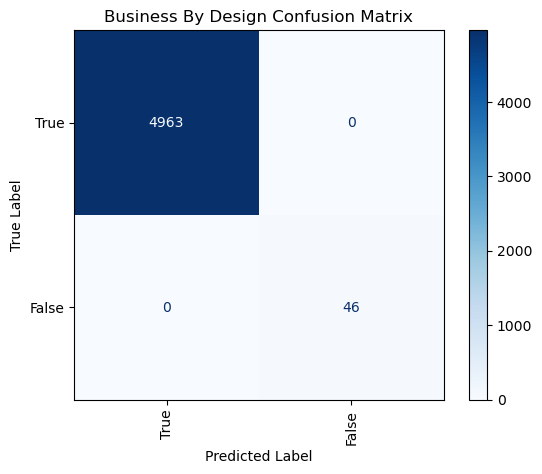

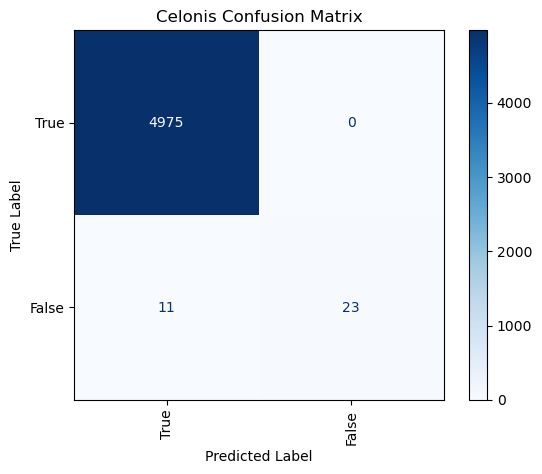

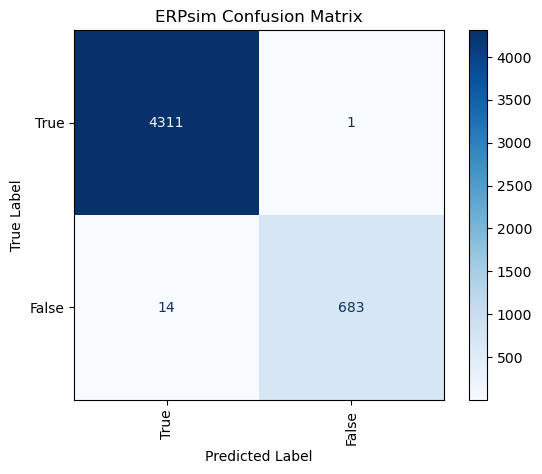

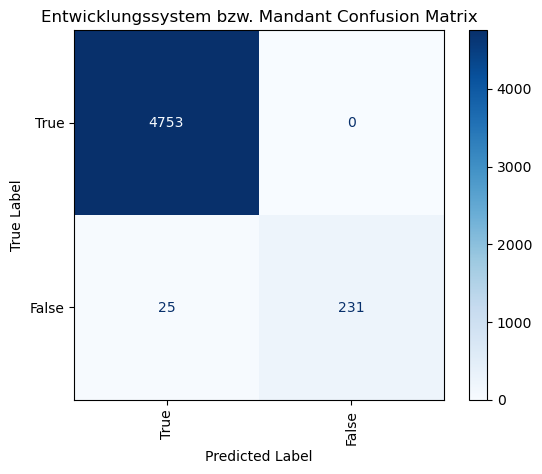

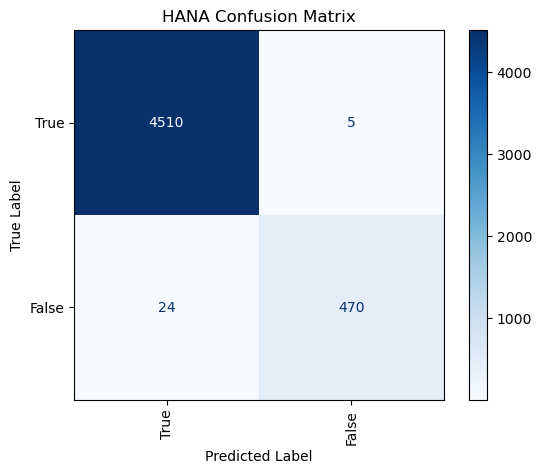

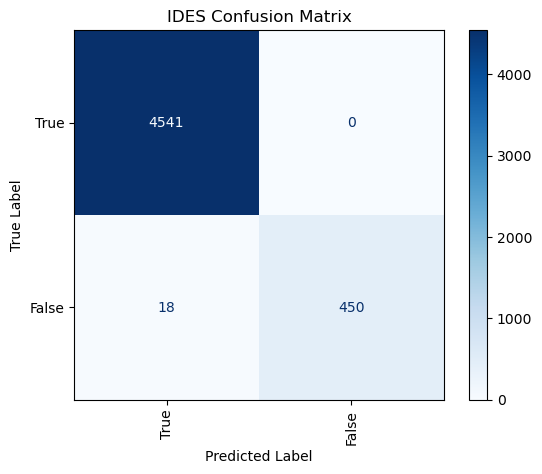

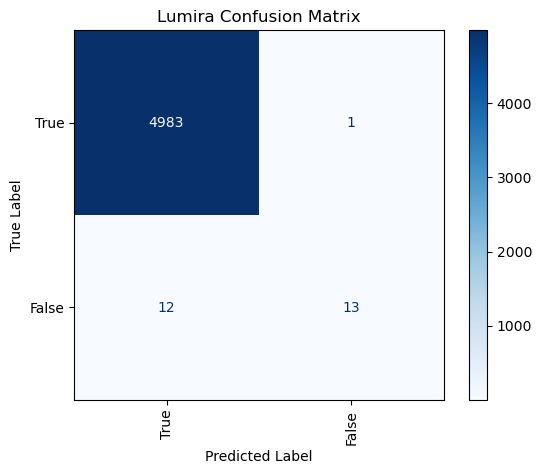

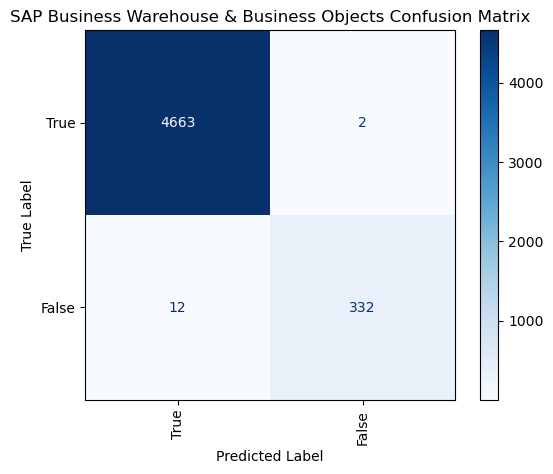

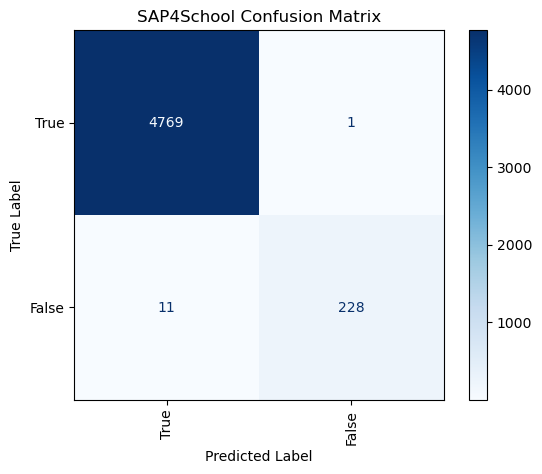

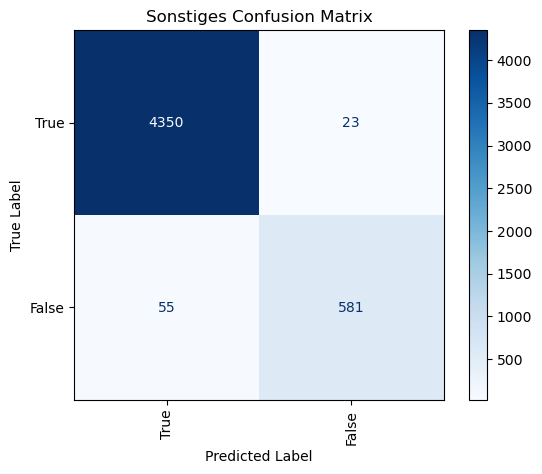

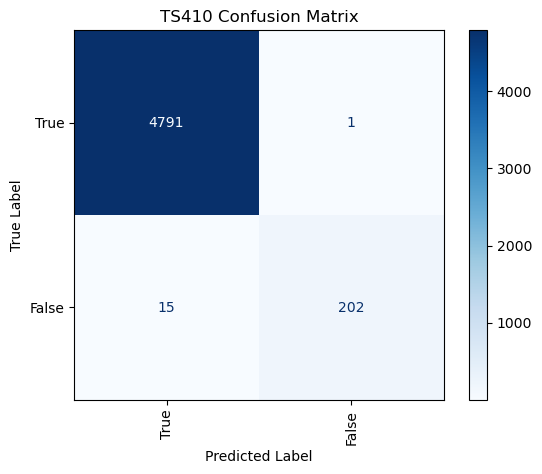

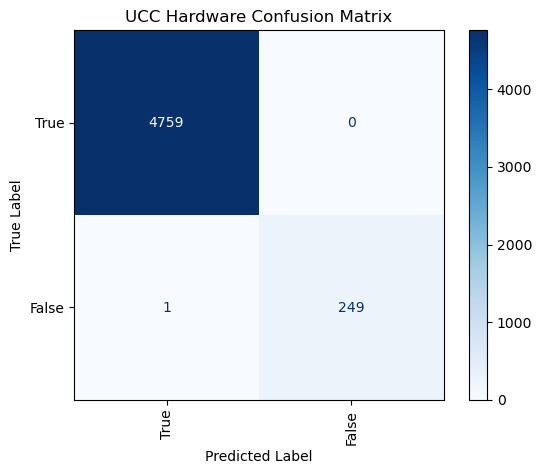

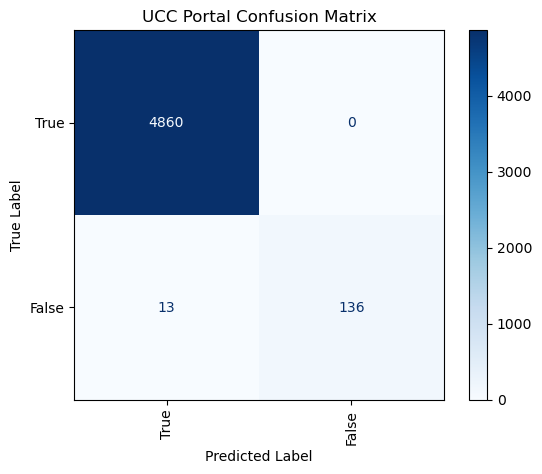

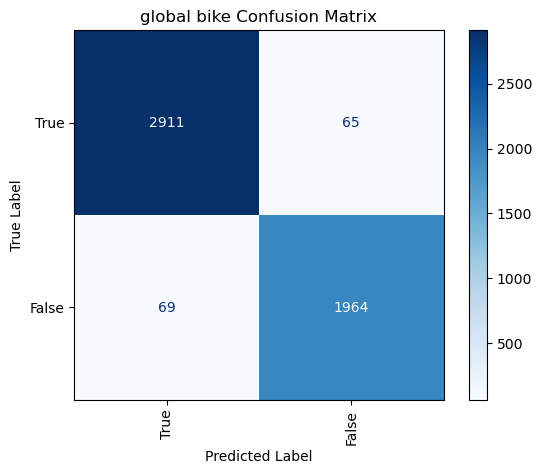

/n
Metrics for Multi Label SVC
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8636454382112198
Precision: 0.9654607895308286
Recall: 0.8877377717391305
F1-Score: 0.9219317694089876


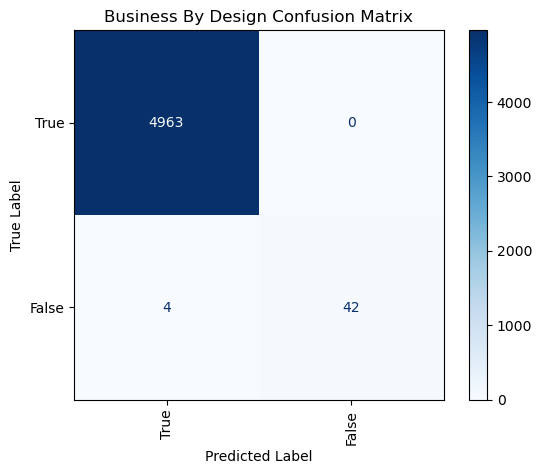

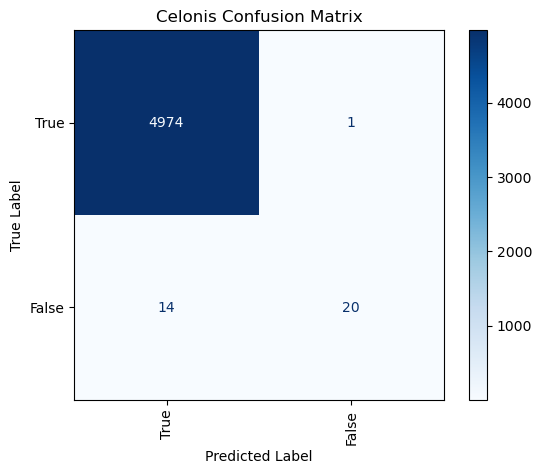

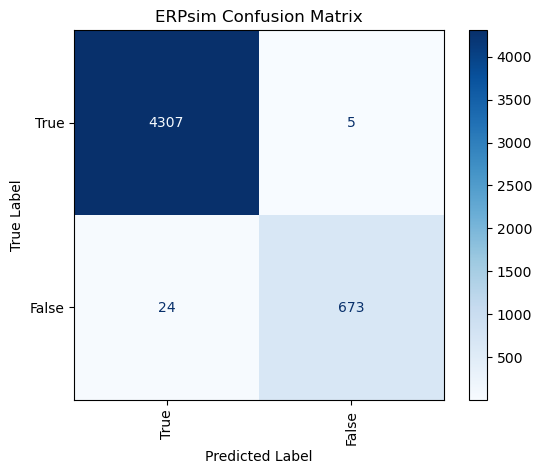

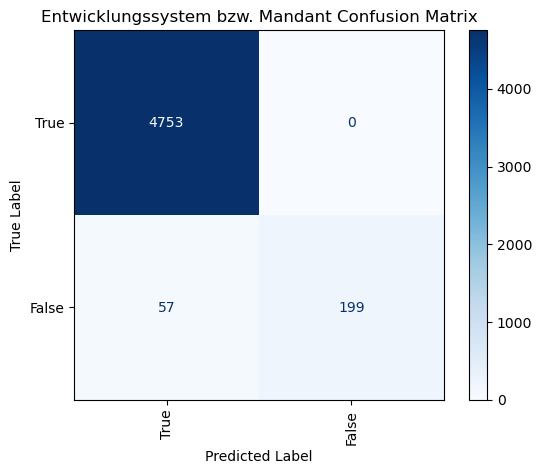

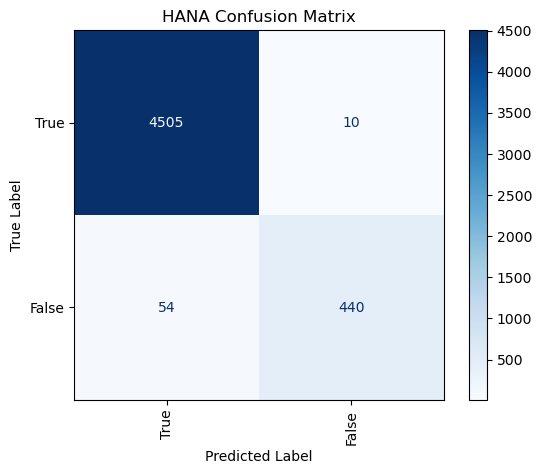

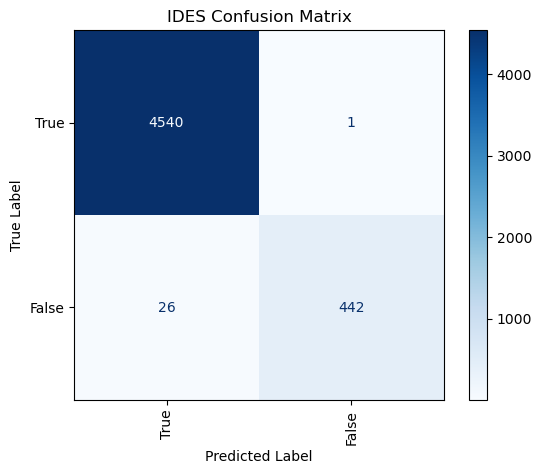

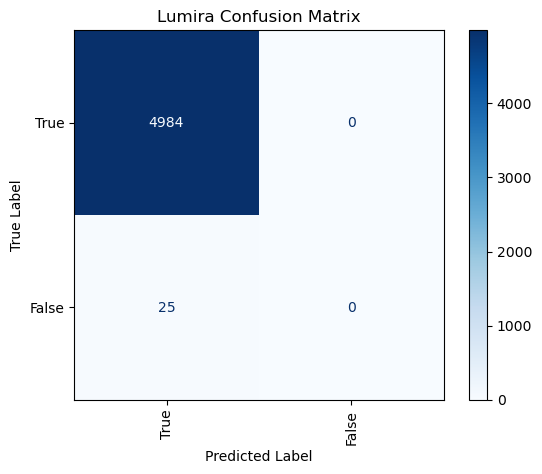

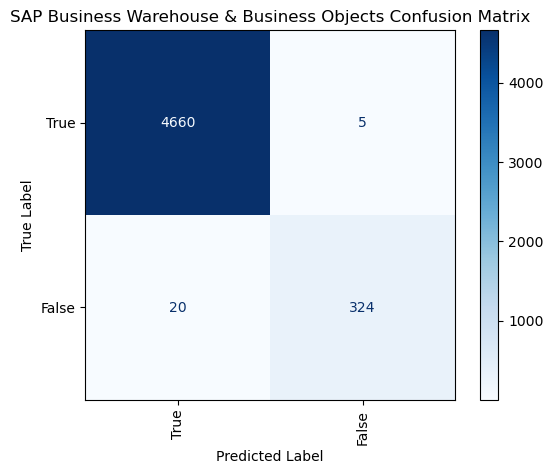

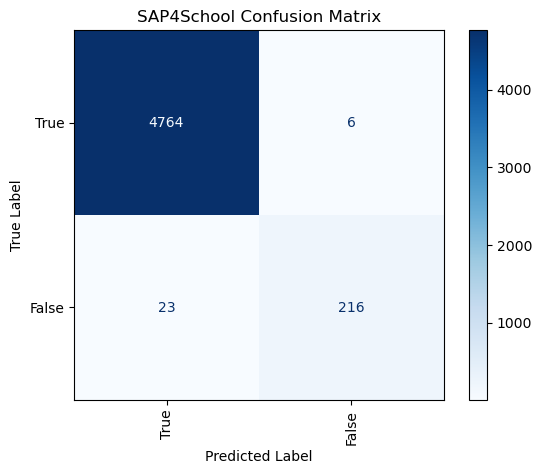

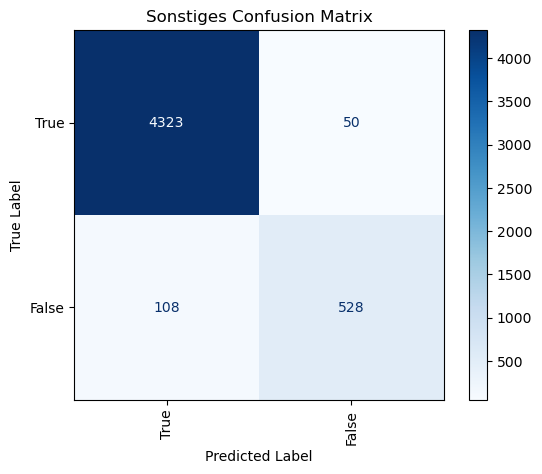

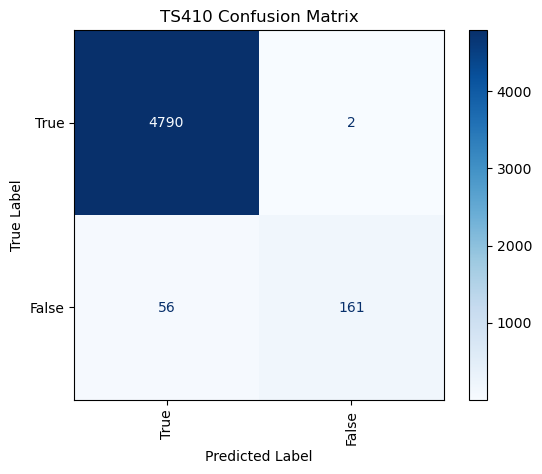

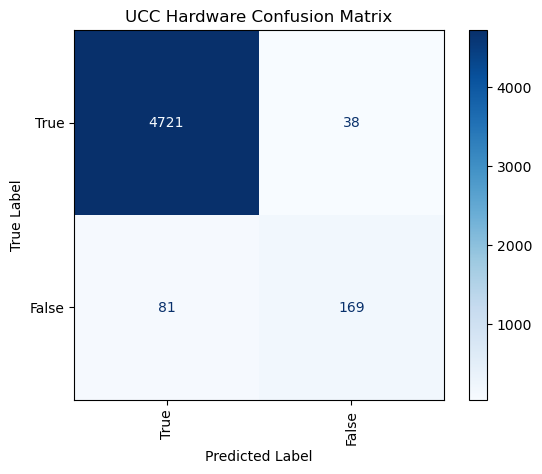

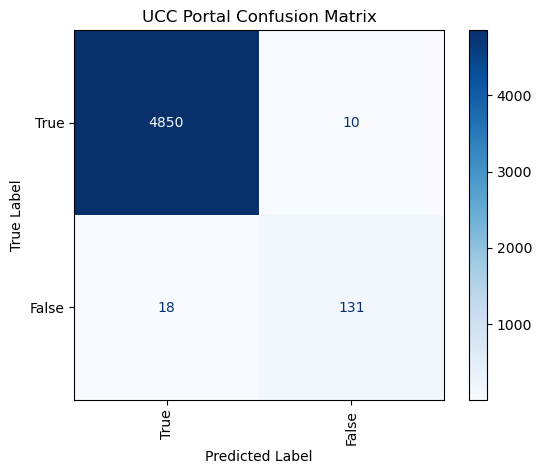

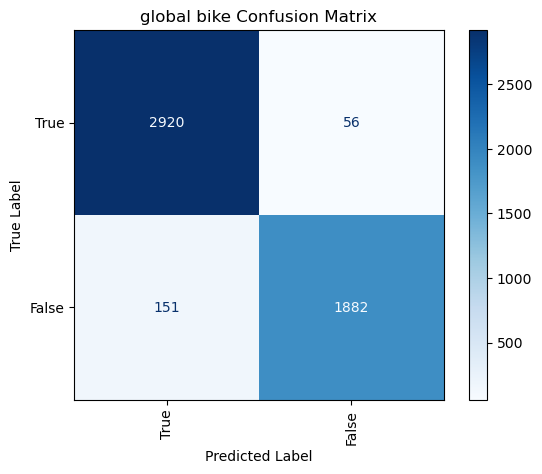

/n
Metrics for Multi Label MultinomialNB
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8301058095428229
Precision: 0.9154967967634015
Recall: 0.8787364130434783
F1-Score: 0.8936782520826929


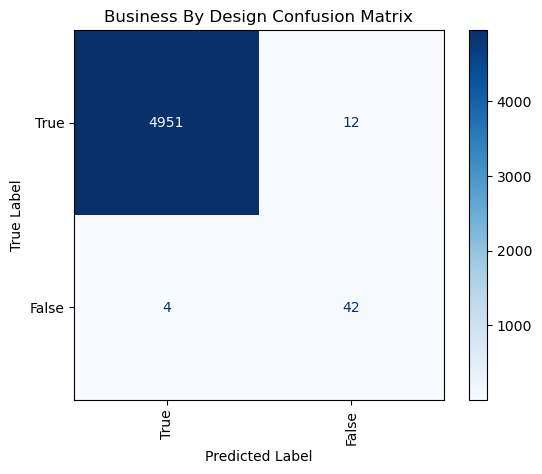

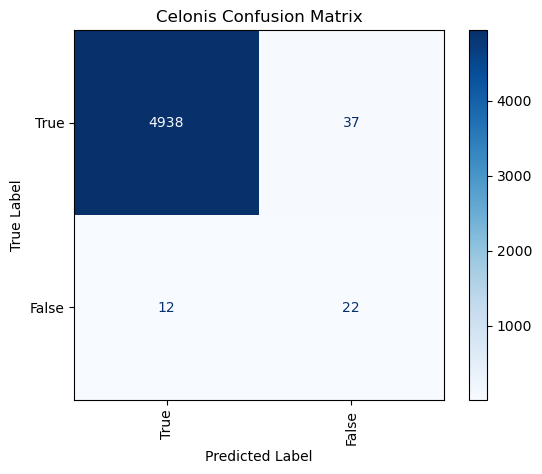

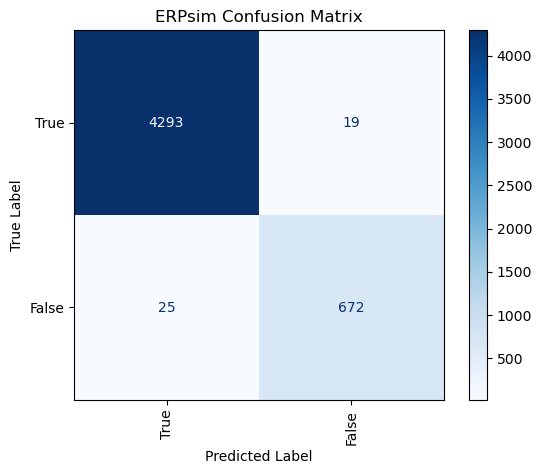

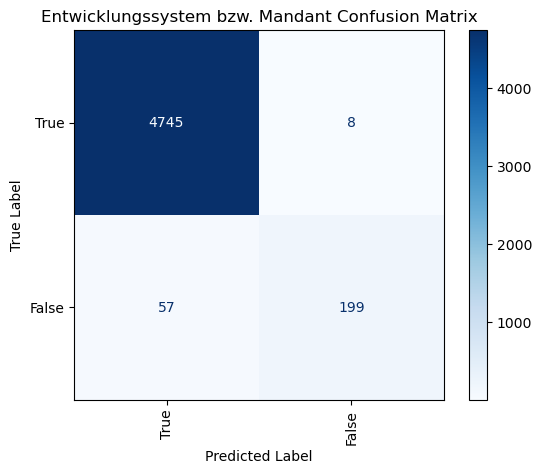

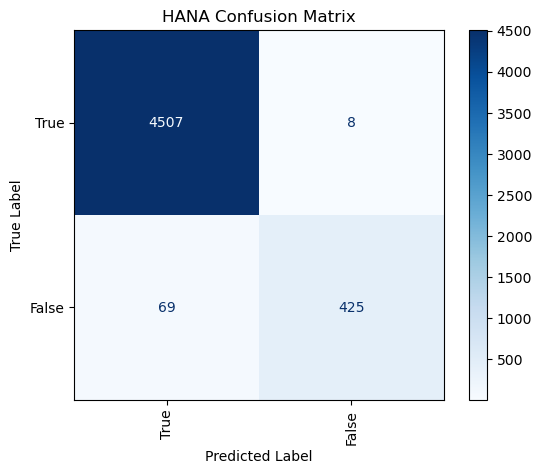

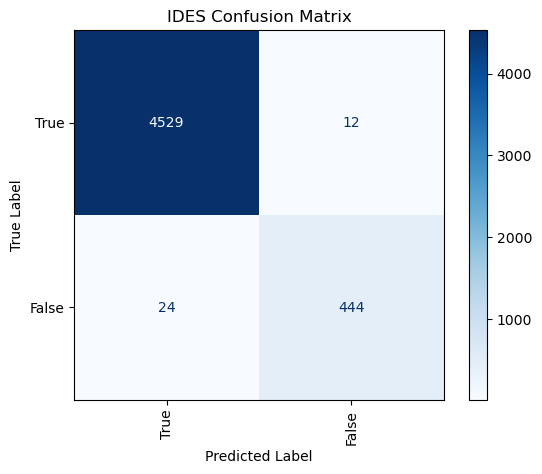

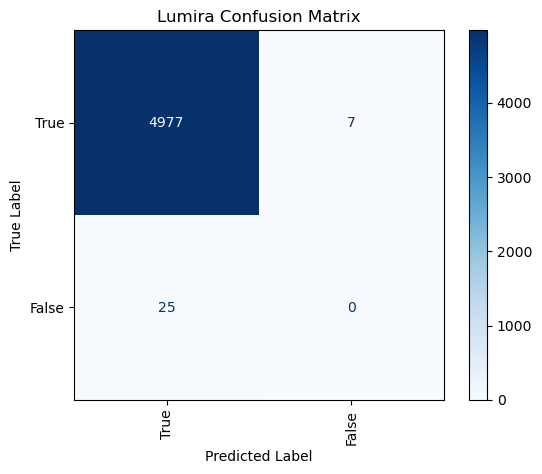

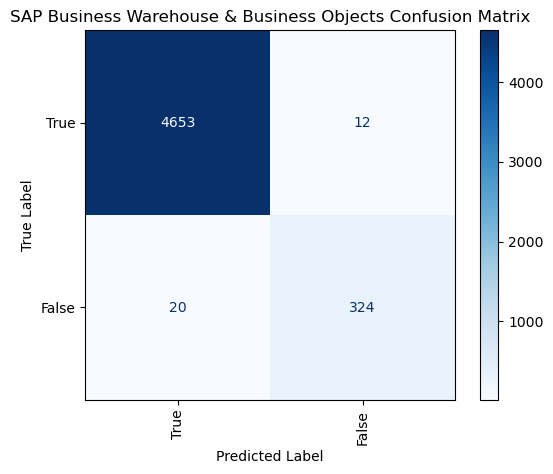

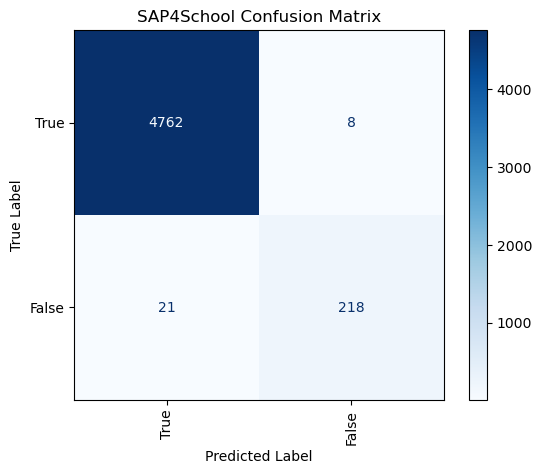

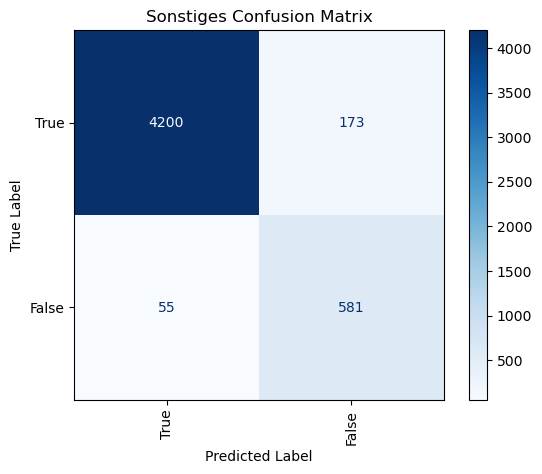

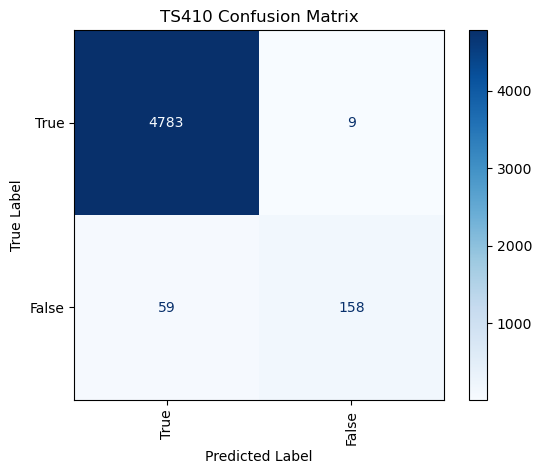

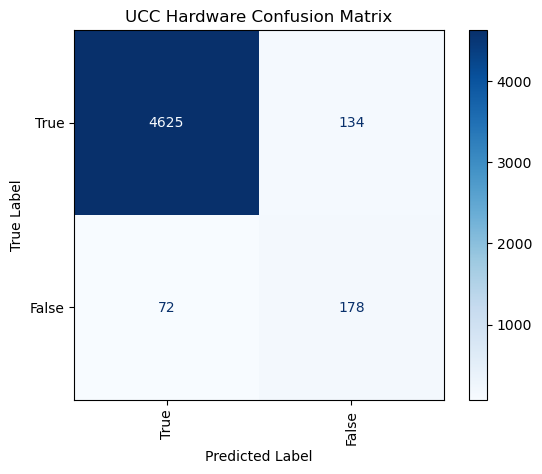

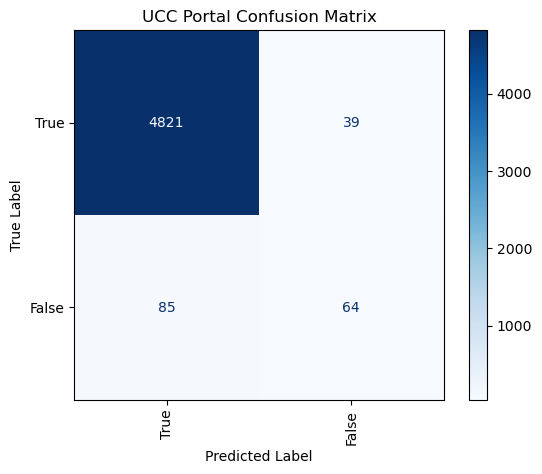

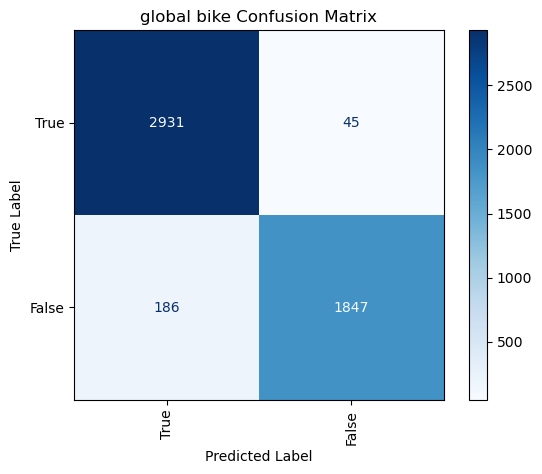

/n
Metrics for Multi Label LogisticRegression
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8580555000998203
Precision: 0.9682310708554628
Recall: 0.8797554347826086
F1-Score: 0.9176398241639874


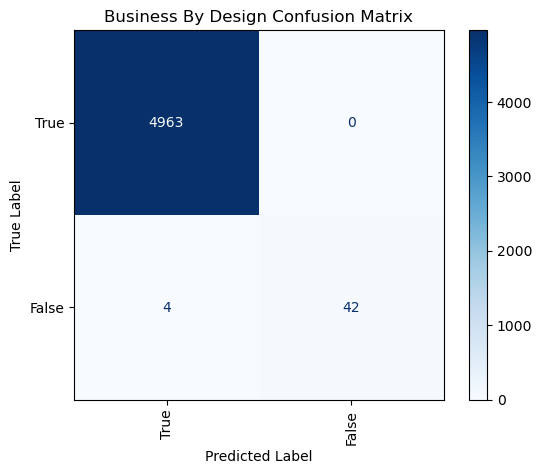

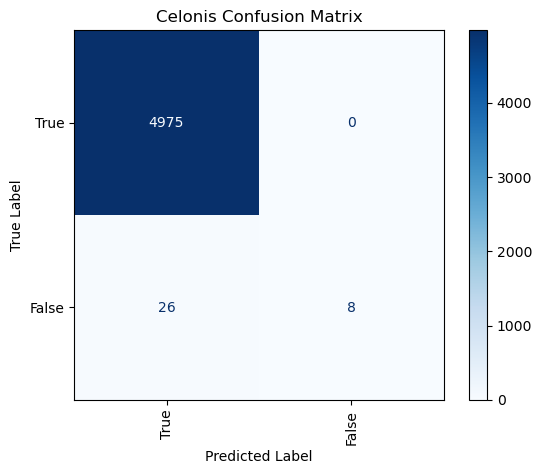

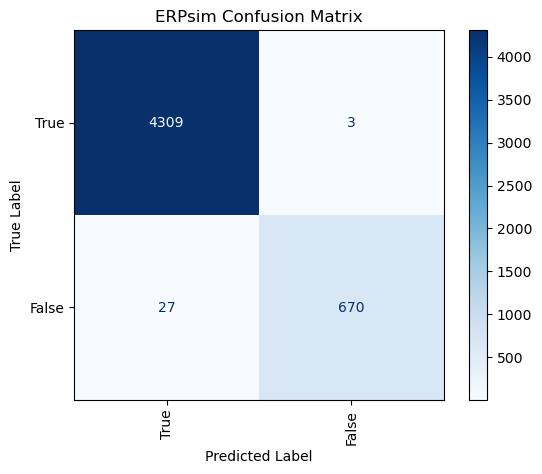

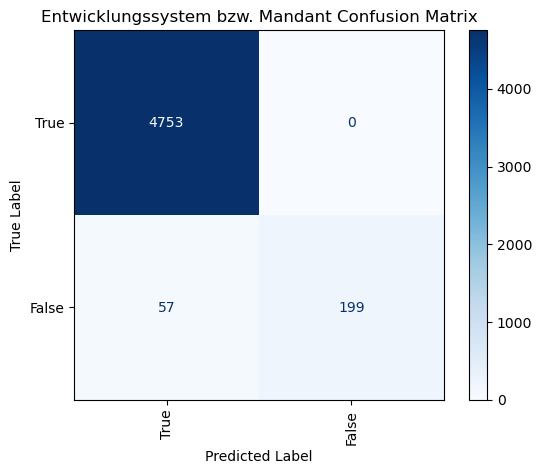

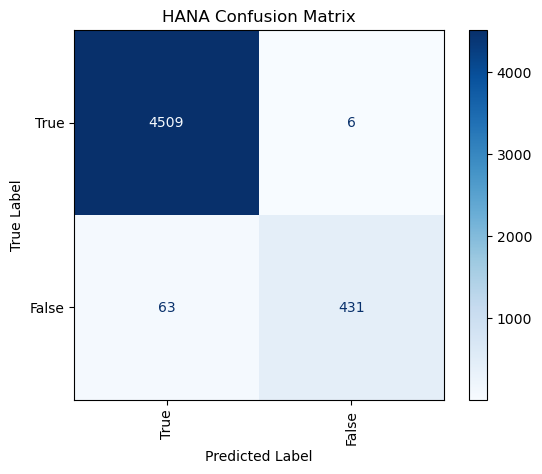

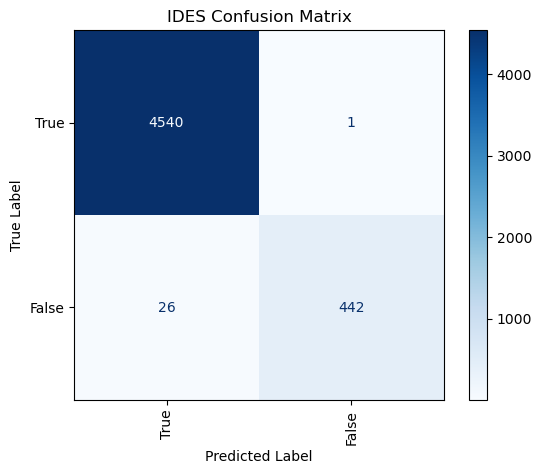

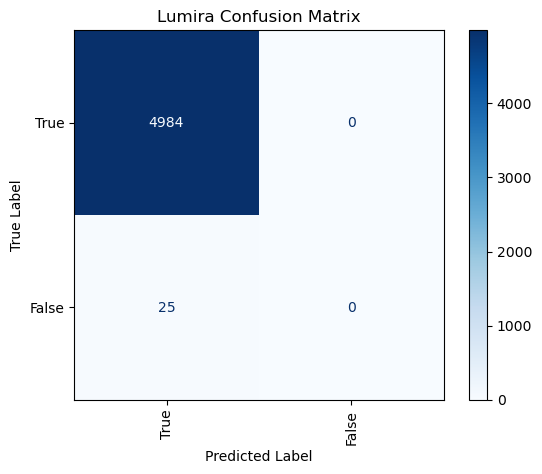

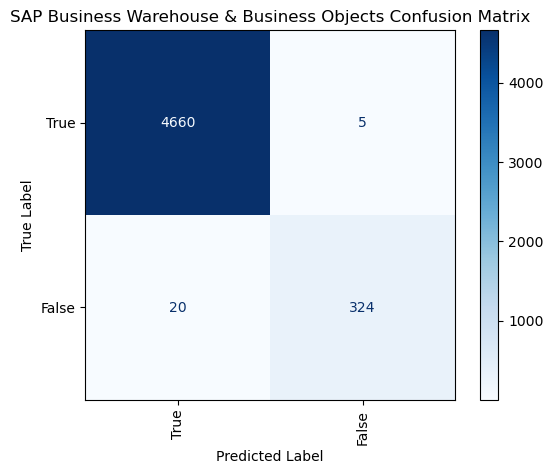

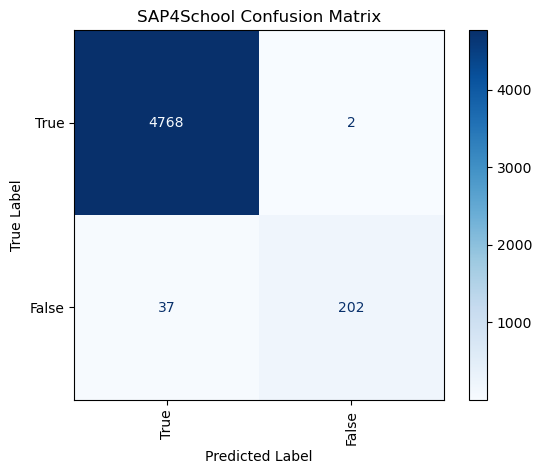

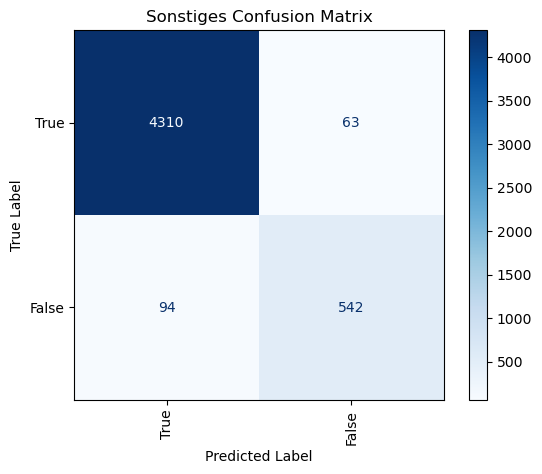

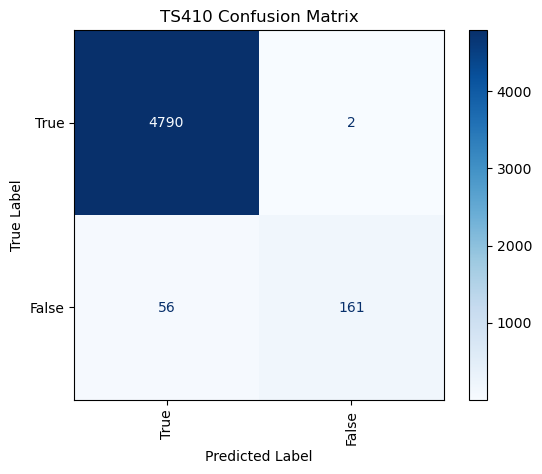

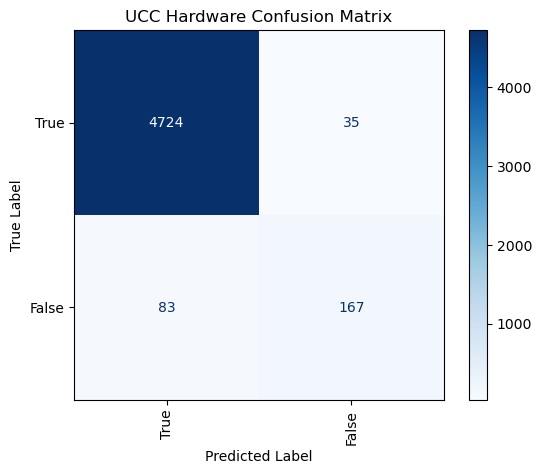

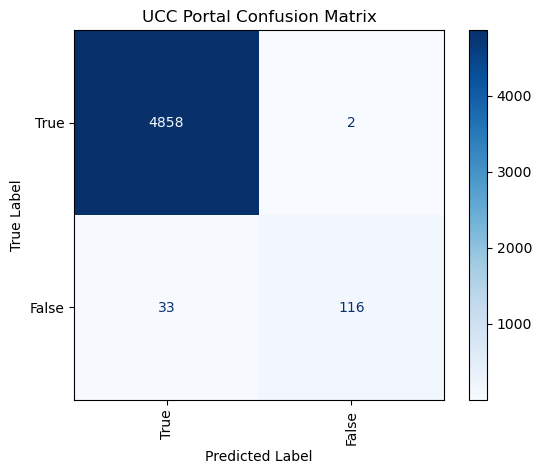

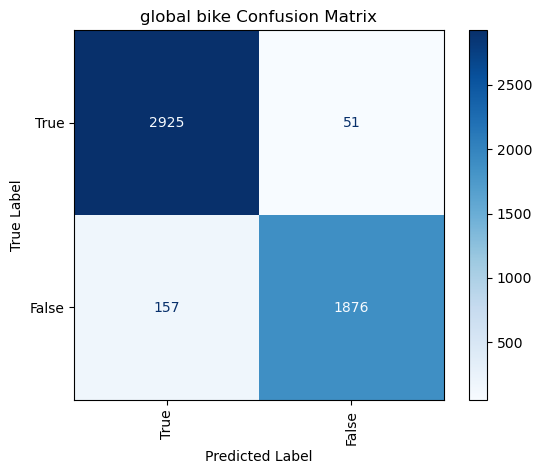

/n
Metrics for Multi Label KNeighborsClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8794170493112398
Precision: 0.9589419693913782
Recall: 0.9067595108695652
F1-Score: 0.929920502484754


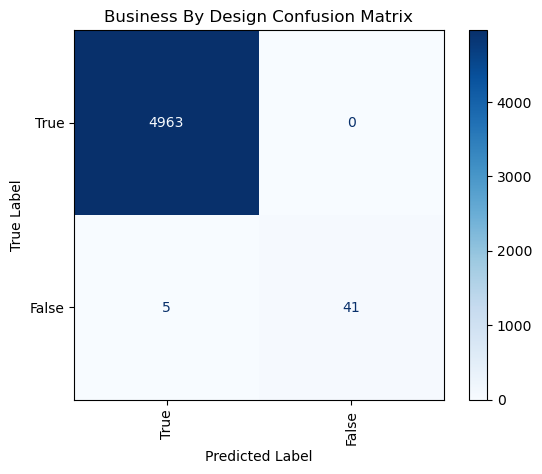

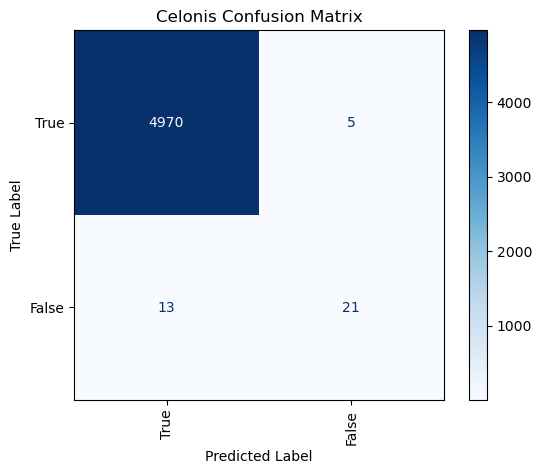

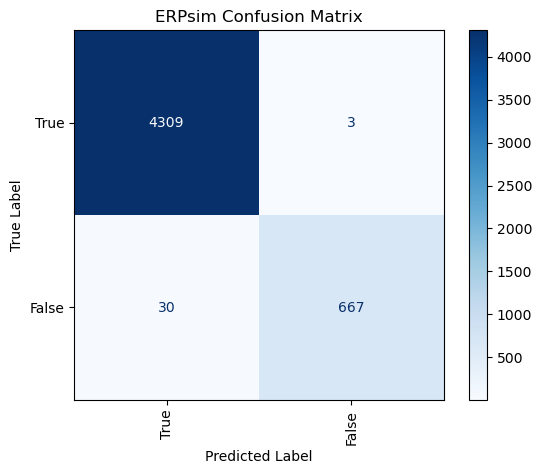

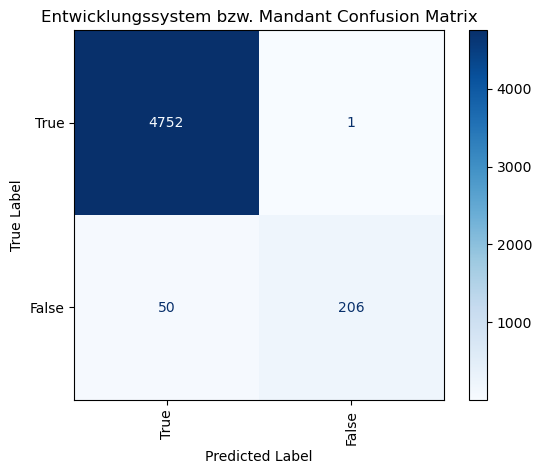

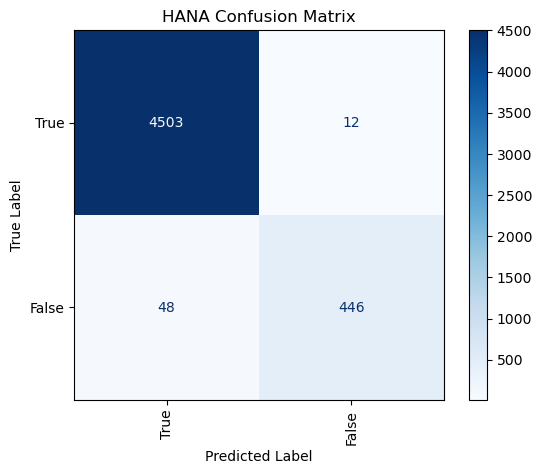

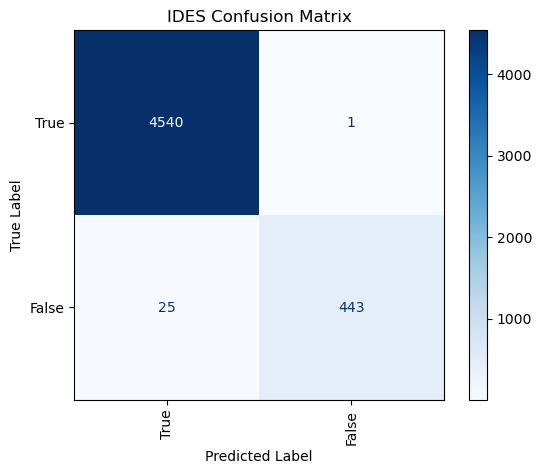

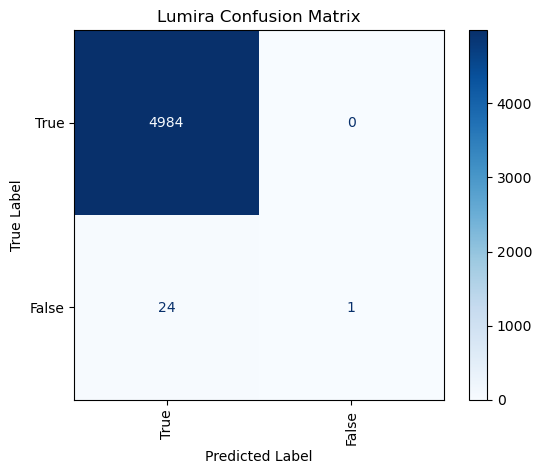

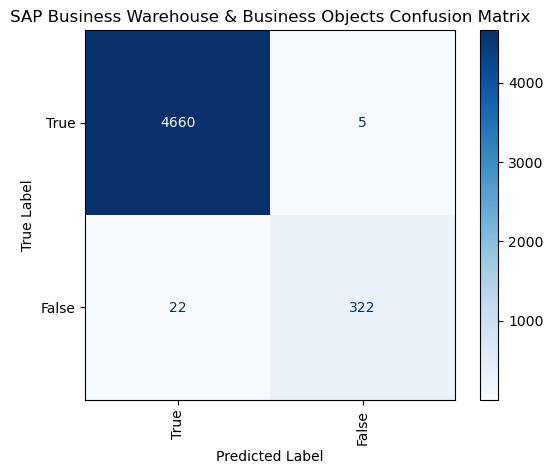

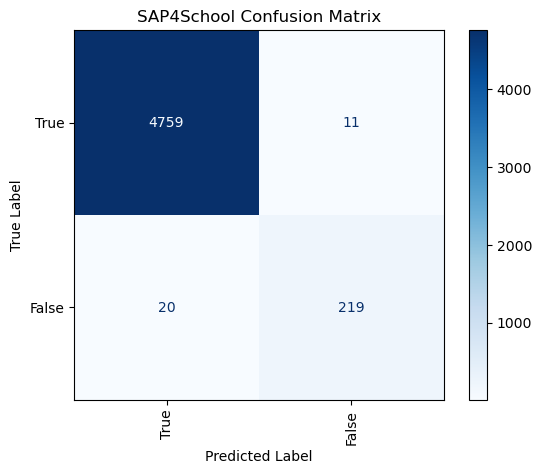

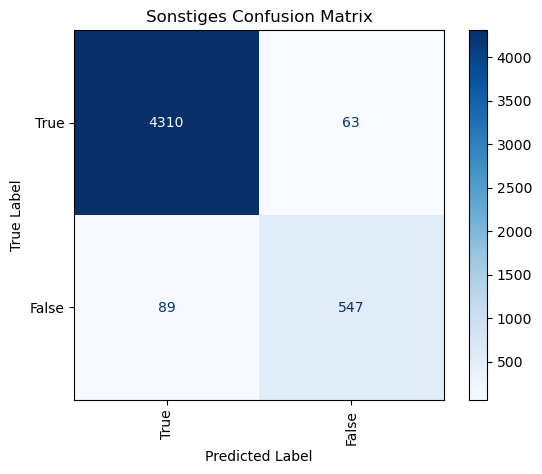

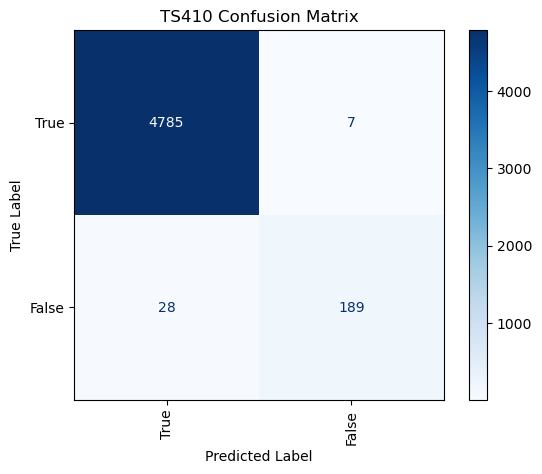

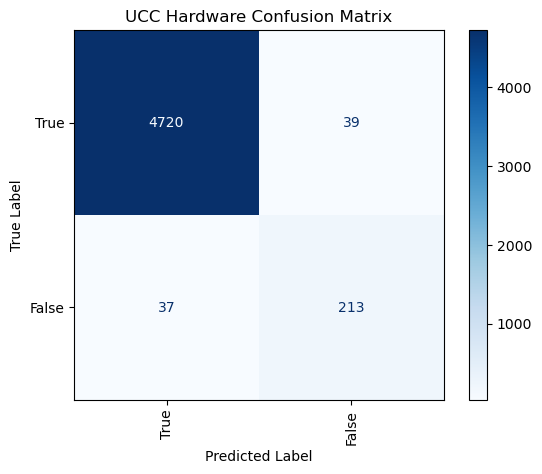

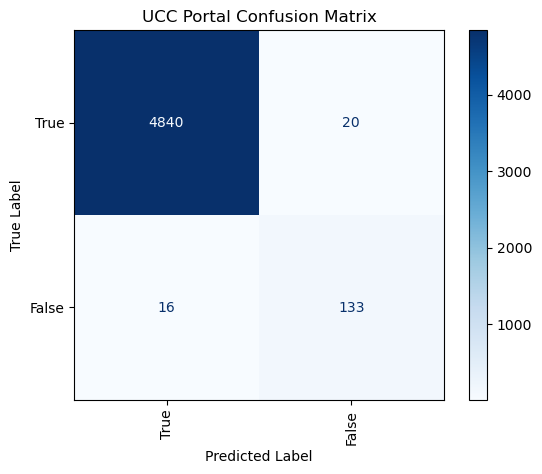

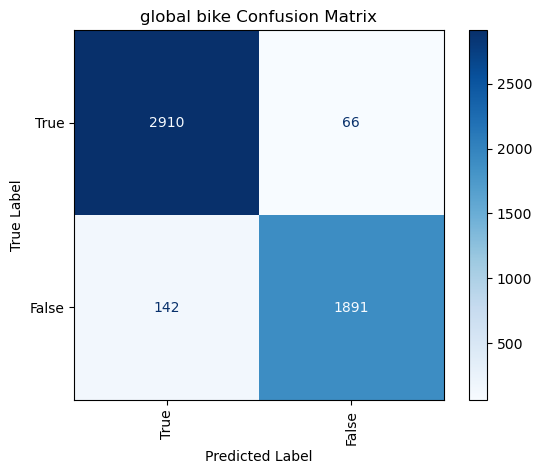

/n
Metrics for Multi Label SGDClassifier
ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS
Accuracy: 0.8456777799960072
Precision: 0.9372783107052045
Recall: 0.8923233695652174
F1-Score: 0.9122858566989029


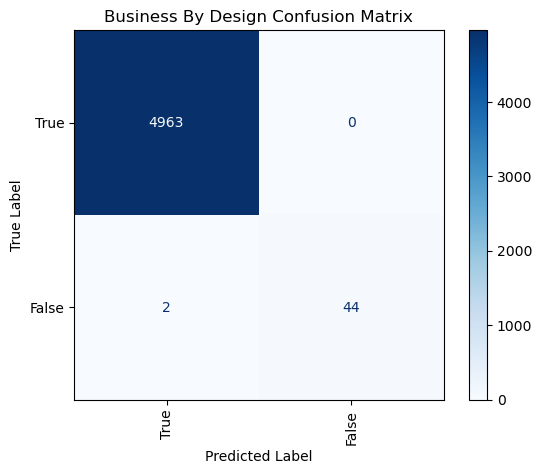

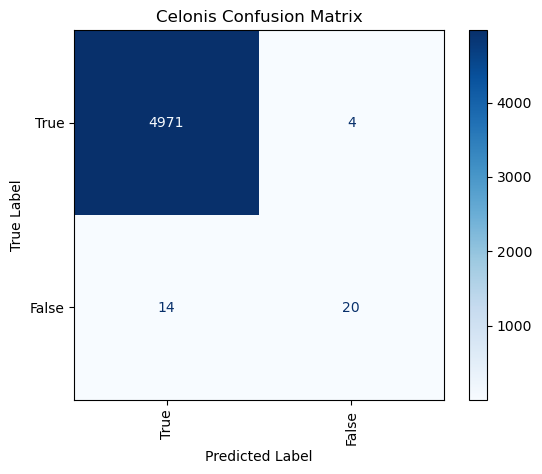

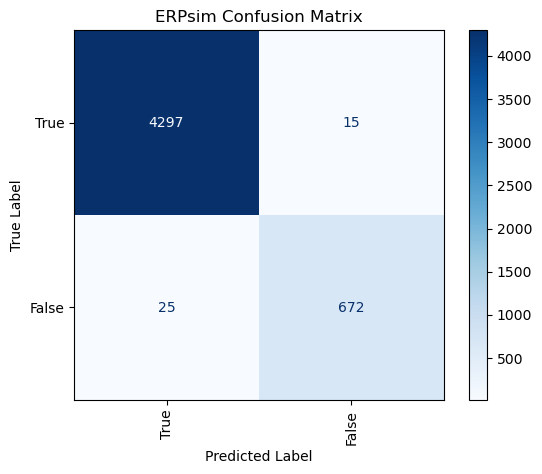

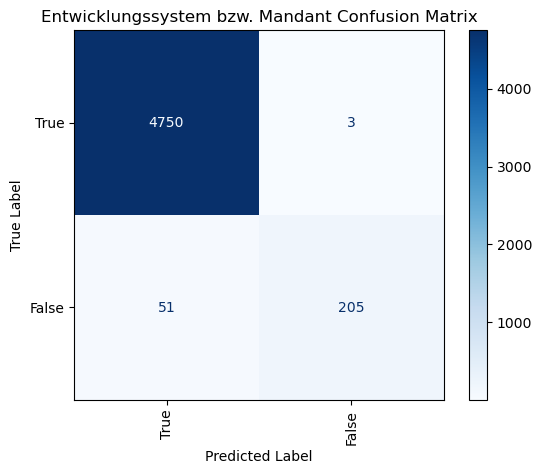

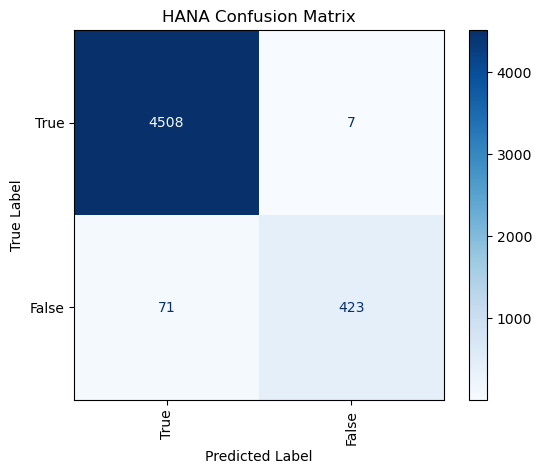

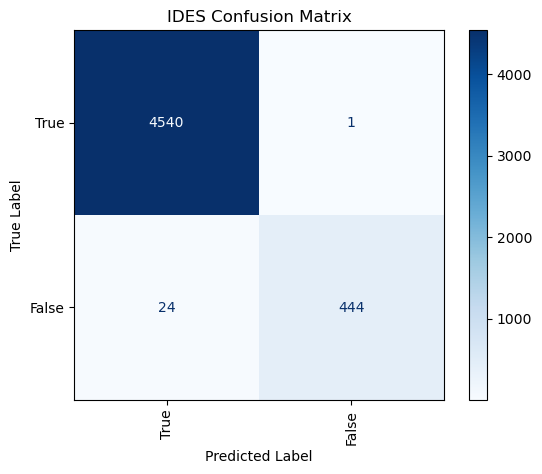

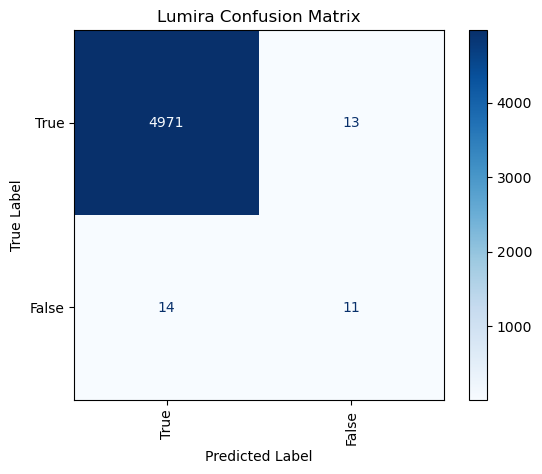

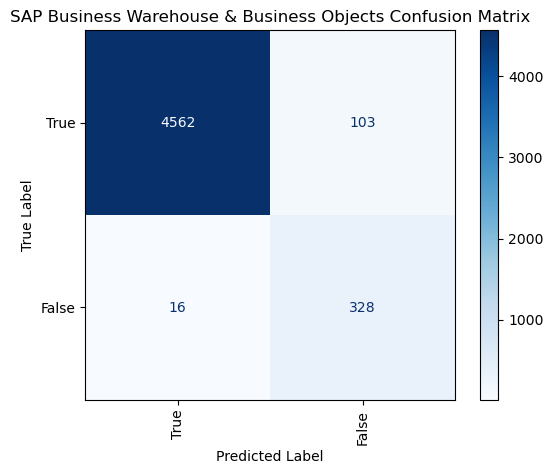

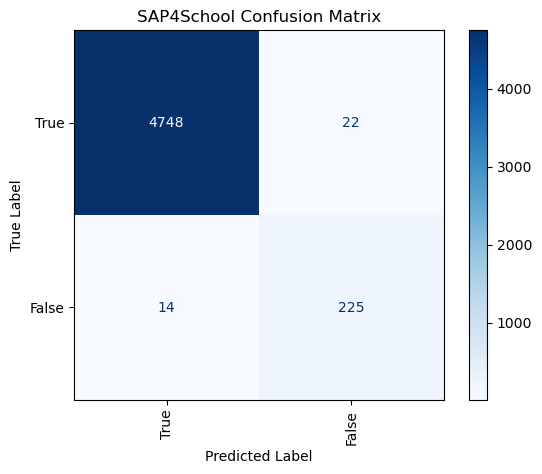

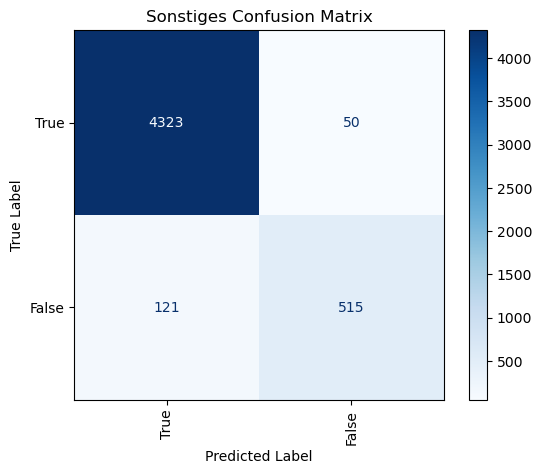

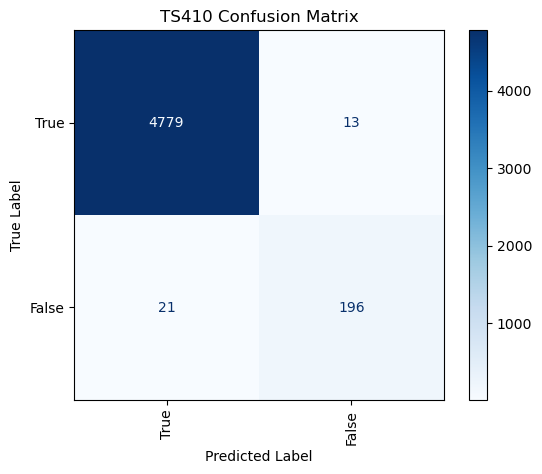

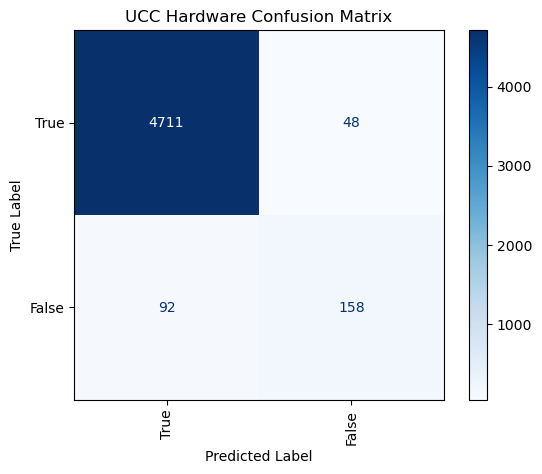

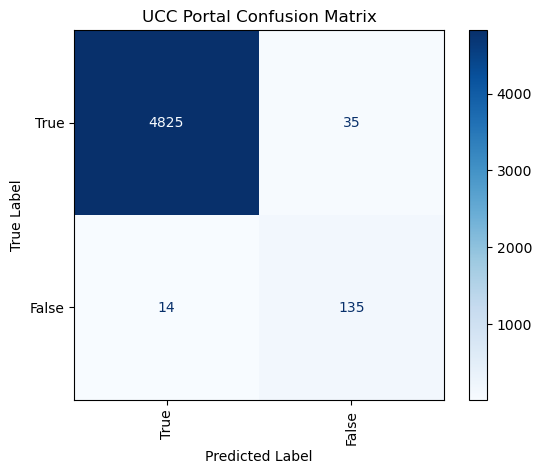

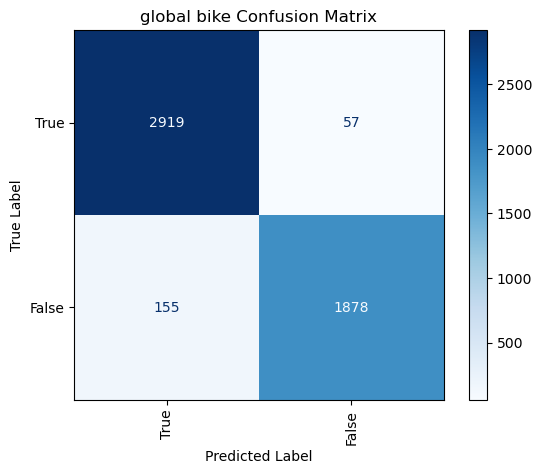

/n


In [21]:
# X_train_raw, x_test_raw, y_train, y_test = train_test_split(
#     filtered_data[['stemmed_text', 'stemmed_beschreibung'] + categorical_columns], # x
#     filtered_data['Produkt Label (Merged)', 'ID'], # y
#     test_size = 0.2,
#     random_state = 1)

categorical_columns = ['Kategorie ID', 'Unterkategorie ID']
X_train_raw = tickets[(['stemmed_text', 'stemmed_beschreibung'] + categorical_columns)]
x_test_raw = X_train_raw

labels = tickets['New Labels'].map(lambda labels_str: labels_str.split(','))

# classes = list(set(tickets['Produkt Label (Merged)']))
multi_binarizer = MultiLabelBinarizer()

y_train = multi_binarizer.fit_transform(labels)
y_test = multi_binarizer.fit_transform(labels)

# Tfidf vectorization for the training set
# TEXT column
tfidf_vectorizer_text = TfidfVectorizer(max_features = 30)
tfidf_matrix_text_train = tfidf_vectorizer_text.fit_transform(X_train_raw['stemmed_text'].values.astype('U'))
# DESCRIPTION column
tfidf_vectorizer_description = TfidfVectorizer(max_features = 30)
tfidf_matrix_description_train = tfidf_vectorizer_description.fit_transform(X_train_raw['stemmed_beschreibung'].values.astype('U'))
# Combine the Tfidf train-matrices horizontally
tfidf_matrix_combined_train = hstack((tfidf_matrix_text_train, tfidf_matrix_description_train))

# Tfidf vectorization for the testing set
# TEXT and DECRIPTION column
tfidf_matrix_text_test = tfidf_vectorizer_text.transform(x_test_raw['stemmed_text'].values.astype('U'))
tfidf_matrix_description_test = tfidf_vectorizer_description.transform(x_test_raw['stemmed_beschreibung'].values.astype('U'))
# Combine the Tfidf test-matrices horizontally
tfidf_matrix_combined_test = hstack((tfidf_matrix_text_test, tfidf_matrix_description_test))

# 6b. Combining categorical and text data 
# One-hot encoding for categorical data
encoder = OneHotEncoder(handle_unknown = 'ignore')
encoded_data_train = encoder.fit_transform(X_train_raw[categorical_columns]).toarray()
encoded_data_test = encoder.transform(x_test_raw[categorical_columns]).toarray()

# Convert the one-hot encoded arrays to sparse matrices
encoded_sparse_train = scipy.sparse.csr_matrix(encoded_data_train)
encoded_sparse_test = scipy.sparse.csr_matrix(encoded_data_test)

# Combine TF-IDF matrix and one hot encoded matrix horizontally for both training and testing sets
x_train = hstack((tfidf_matrix_combined_train, encoded_sparse_train))
x_test = hstack((tfidf_matrix_combined_test, encoded_sparse_test))

#print(final_matrix_train)

# Classification and evaluation in one method with different classifiers as parameter
def multiclassify_with_metrics(classifier):
    clf_name = 'Multi Label ' + classifier.__class__.__name__

    # Initializing and prediction
    multi_clf = MultiOutputClassifier(classifier).fit(x_train, y_train)
    y_pred = multi_clf.predict(x_test)
    
    # Performance evaluation
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average= 'weighted')
    f1_scr = f1_score(y_test, y_pred, average = 'weighted')
    
    # str_pred = multi_binarizer.inverse_transform(y_pred)
    # str_test = multi_binarizer.inverse_transform(y_test)
    # print(str_pred)
    # print(str_test)

    conf_matrix = multilabel_confusion_matrix(y_test, y_pred)

    # Worst missclassified labels
    # upper_triangle = np.triu(conf_matrix, k = 1)
    # worst_indices = np.unravel_index(np.argmax(upper_triangle), upper_triangle.shape)
    # worst_one = worst_indices[0]
    # worst_two = worst_indices[1]

    # Evaluation metrics output
    print(f'Metrics for {clf_name}')
    print('ALL COMPARISONS FOR THE METRICS WERE BETWEEN SETS WHICH MUST CONTAIN IDENTICAL ELEMENTS')
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', f1_scr)
    # print('Biggest error betwenen:', worst_one, 'and', worst_two)
    
    # Confusion Matrix Display
    for class_index in range(0, conf_matrix.shape[0]):
        class_name = multi_binarizer.classes_[class_index]
        class_conf_mat = conf_matrix[class_index]
        cm_display = ConfusionMatrixDisplay(class_conf_mat, display_labels=['True', 'False'])
        cm_display.plot(cmap = "Blues", values_format = "d", xticks_rotation = 'vertical')
        plt.title(f'{class_name} Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        # plt.savefig(f"{clf_name}_confusion_matrix_global_plus_legacy.jpg", format = 'jpg', dpi = 300, bbox_inches = 'tight')
        plt.show()

    print('/n')
    

# RandomForest classifier
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state = 1)
multiclassify_with_metrics(rf_classifier)

# SVM classifier
svm_classifier = SVC(kernel = 'linear', random_state = 1)
multiclassify_with_metrics(svm_classifier)

# Naive Bayes classifier
nb_classifier = MultinomialNB()
multiclassify_with_metrics(nb_classifier)

# LogReg 'max_iter' was increased from its default value because it threw a an erro in later execution 
# for not converging when kept at 100
# Logistic Regression classifier
logreg_classifier = LogisticRegression(random_state = 1, max_iter = 200)
multiclassify_with_metrics(logreg_classifier)

# KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
multiclassify_with_metrics(knn_classifier)

# LSW: I want to see a Perceptron Approach
sgd_classifier = SGDClassifier(loss="perceptron", learning_rate="constant", eta0=0.02)
multiclassify_with_metrics(sgd_classifier)
